## NYC Parking Tickets

The NYC Department of Finance collects data on every parking ticket issued in NYC (~10M per year!). This data is made publicly available to aid in ticket resolution and to guide policymakers.


There are four files, covering Aug 2013-June 2017. The files are roughly organized by fiscal year (July 1 - June 30) with the exception of the initial dataset. The initial dataset also lacks 8 columns that are included in the other three datasets (although be warned that these additional data columns are used sparingly). See the dataset descriptions for exact details. Columns include information about the vehicle ticketed, the ticket issued, location, and time.

#### Since each dataset is too big. I have used only file for analysis purpose
#### For now I have taken only 1 file,  Parking_Violations_Issued__Fiscal_Year_2014__August_2013___June_2014_.csv'
#### Once I start working in TDI, I would utilise the entire dataset from all the 4 years for the purpose of better analysis


In [1]:
# importing libraries 
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data_tickets=pd. read_csv('Parking_Violations_Issued_-_Fiscal_Year_2014__August_2013___June_2014_.csv')
data_tickets.head()

/Users/shrutimehta/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (17,18,20,21,22,23,29,30,31,32,36,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Hydrant Violation,Double Parking Violation,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,1283294138,GBB9093,NY,PAS,08/04/2013,46,SUBN,AUDI,P,37250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1283294151,62416MB,NY,COM,08/04/2013,46,VAN,FORD,P,37290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1283294163,78755JZ,NY,COM,08/05/2013,46,P-U,CHEVR,P,37030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1283294175,63009MA,NY,COM,08/05/2013,46,VAN,FORD,P,37270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1283294187,91648MC,NY,COM,08/08/2013,41,TRLR,GMC,P,37240,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Analysis: From the data provided, I am trying to analyse how many vehicles who got ticket had registration from different cities 

In [3]:
#grouping the data by Registration State and counting the number of tickets issued
ny_datatick=data_tickets.groupby(by='Registration State',as_index=False).count()
ny_datatick.head()

,Registration State,Summons Number,Plate ID,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Hydrant Violation,Double Parking Violation,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,99,38080,38077,38080,38080,38080,33309,31610,38080,38080,...,0,0,0,0,0,0,0,0,0,0
1,AB,243,243,243,243,243,240,240,243,243,...,0,0,0,0,0,0,0,0,0,0
2,AK,961,961,961,961,961,950,951,961,961,...,0,0,0,0,0,0,0,0,0,0
3,AL,5828,5828,5828,5828,5828,5767,5770,5828,5828,...,0,0,0,0,0,0,0,0,0,0
4,AR,2716,2716,2716,2716,2716,2694,2696,2716,2716,...,0,0,0,0,0,0,0,0,0,0


In [42]:
columns=ny_datatick[['Registration State','Summons Number']] # selecting the columns for further analysis 
columns.head()

,Registration State,Summons Number
0,99,38080
1,AB,243
2,AK,961
3,AL,5828
4,AR,2716


In [44]:
#filtering dataset further and removing 99 as an error
columns_city=columns[columns_ny['Registration State']!='99']
columns_city.head() #all other cities 

,Registration State,Summons Number
1,AB,243
2,AK,961
3,AL,5828
4,AR,2716
5,AZ,24245


In [45]:
columns_ny=columns_city[columns_ny['Registration State']=='NY']
columns_ny.head() #all other cities

/Users/shrutimehta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Registration State,Summons Number
46,NY,7029804


In [ ]:
columns_cities=columns_cities[columns_ny['Registration State']!='NY']
columns_ny.head() #all other cities except 'NY'

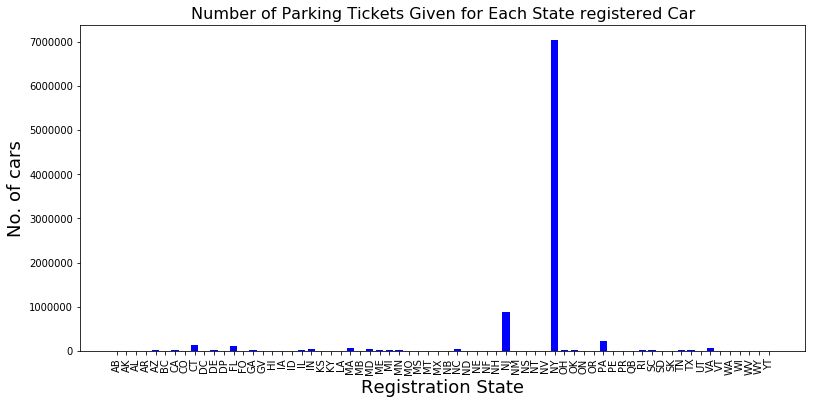

In [65]:
plt.figure(figsize=(13,6))
x=columns_city['Summons Number']
y=columns_city['Registration State']

plt.bar(y,x, color = 'b', width = 0.75)
plt.xticks( rotation=90)

plt.title("Number of Parking Tickets Given for Each State registered Car", fontsize=16)
plt.xlabel("Registration State", fontsize=18)
plt.ylabel("No. of cars", fontsize=18)
plt.show()

#### Conclusion: From this we can conclude, that majorities tickets were issued to the locals of New York, followed by New Jersey and Pennsylvania

##### Analysis: In this analysis, I am analysing monthly tickets issues to the locals of new york with other states. 

In [5]:
data_tickets.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Hydrant Violation,Double Parking Violation,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,1283294138,GBB9093,NY,PAS,08/04/2013,46,SUBN,AUDI,P,37250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1283294151,62416MB,NY,COM,08/04/2013,46,VAN,FORD,P,37290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1283294163,78755JZ,NY,COM,08/05/2013,46,P-U,CHEVR,P,37030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1283294175,63009MA,NY,COM,08/05/2013,46,VAN,FORD,P,37270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1283294187,91648MC,NY,COM,08/08/2013,41,TRLR,GMC,P,37240,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_tickets['date'] = pd.to_datetime(data_tickets['Issue Date']) # Convert date to datetime
data_tickets['month'] = data_tickets['date'].dt.month #extract month from Issue Date

object


In [7]:
data_tickets.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA,date,month
0,1283294138,GBB9093,NY,PAS,08/04/2013,46,SUBN,AUDI,P,37250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-04,8
1,1283294151,62416MB,NY,COM,08/04/2013,46,VAN,FORD,P,37290,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-04,8
2,1283294163,78755JZ,NY,COM,08/05/2013,46,P-U,CHEVR,P,37030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-05,8
3,1283294175,63009MA,NY,COM,08/05/2013,46,VAN,FORD,P,37270,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-05,8
4,1283294187,91648MC,NY,COM,08/08/2013,41,TRLR,GMC,P,37240,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-08,8


In [8]:
tikt_nycity=data_tickets[data_tickets['Registration State']=='NY'] # NY data for all months

month_grp_nycity=tikt_nycity.groupby(by=tikt_nycity['month'],as_index=False).count() #group NY data for each month
month_grp_nycity.head()
month_grp_nycity_sel=month_grp_nycity[['month','Summons Number']]
month_grp_nycity_sel

,month,Summons Number
0,1,568300
1,2,513474
2,3,703917
3,4,667065
4,5,695894
5,6,529879
6,7,131506
7,8,638861
8,9,636908
9,10,733071


In [9]:
tikt_othercity=data_tickets[data_tickets['Registration State']!='NY'] # other cities data for all months

month_grp_othercity=tikt_othercity.groupby(by=tikt_othercity['month'],as_index=False).count()#group other cities data for all the months
month_grp_othercity.head()
month_grp_othercity_sel=month_grp_othercity[['month','Summons Number']]
month_grp_othercity_sel

,month,Summons Number
0,1,154139
1,2,140727
2,3,203588
3,4,193152
4,5,202515
5,6,151254
6,7,41651
7,8,200089
8,9,190494
9,10,220387


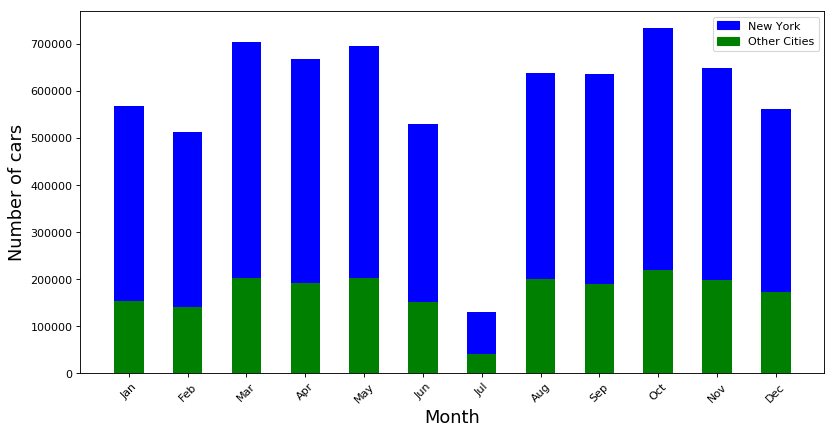

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k') #size of the plot

labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
plt.bar(month_grp_nycity_sel['month'] , month_grp_nycity_sel['Summons Number'], color = 'b', width = 0.5) # plotting the graph
plt.bar(month_grp_othercity_sel['month'], month_grp_othercity_sel['Summons Number'], color = 'g', width = 0.5)
plt.xticks(month_grp_nycity_sel['month'], labels, rotation=45) #providing xticks to the graph

blue_patch=mpatches.Patch(color='b',label='New York') 
green_patch=mpatches.Patch(color='g',label='Other Cities')
plt.legend(handles=[blue_patch,green_patch]) #providing the labels
plt.xlabel('Month',fontsize=16)
plt.ylabel('Number of cars',fontsize=16)
plt.show()

#### Conclusion:The maximum tickets were created in October and majority of them by the New York locals followed by May.  The least tickets were issued in July.